# IGFAE Lambda->pmunu Research

In [1]:
#from numpy import * (to import everything from the numpy library)
from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt

In [46]:
pip install uproot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import uproot

In [3]:
file = uproot.open("GenLpmu2018MD_wMpi.root")  #This is our Lambda->pmunu signal simulation
file2 = uproot.open("GenLppi2018MD_wMpi.root") ##This is our Lambda->ppi background

In [4]:
tree = file["T"]
tree2= file2["T"]

In [33]:
pd_Signal=tree.arrays(library='pd')
print(pd_Signal.keys())
print(('yes') if 'pion_TRUEID' in pd_Signal.keys() else 'no')
#here we create our dataframes, just with Lambda0_M and Lambda0_PT variables
pd_Background=tree2.arrays(library='pd') 

Index(['Lambda0_ENDVERTEX_X', 'Lambda0_ENDVERTEX_Y', 'Lambda0_ENDVERTEX_Z',
       'Lambda0_ENDVERTEX_XERR', 'Lambda0_ENDVERTEX_YERR',
       'Lambda0_ENDVERTEX_ZERR', 'Lambda0_ENDVERTEX_CHI2',
       'Lambda0_ENDVERTEX_NDOF', 'Lambda0_ENDVERTEX_COV_', 'Lambda0_OWNPV_X',
       ...
       'Mppig', 'Mpmunu', 'APLA', 'MppiCorr', 'fit_pnuz', 'nu_fitchi2',
       'fit_pgz', 'g_fitchi2', 'corr_psc', 'corr_fitchi2'],
      dtype='object', length=541)
no


In [35]:
print(('yes') if 'p_TRUEID' in pd_Signal.keys() else 'no')

yes


In [6]:
pd_Signal

,Lambda0_ENDVERTEX_X,Lambda0_ENDVERTEX_Y,Lambda0_ENDVERTEX_Z,Lambda0_ENDVERTEX_XERR,Lambda0_ENDVERTEX_YERR,Lambda0_ENDVERTEX_ZERR,Lambda0_ENDVERTEX_CHI2,Lambda0_ENDVERTEX_NDOF,Lambda0_ENDVERTEX_COV_,Lambda0_OWNPV_X,...,Mppig,Mpmunu,APLA,MppiCorr,fit_pnuz,nu_fitchi2,fit_pgz,g_fitchi2,corr_psc,corr_fitchi2
0,-0.4647,8.858700,517.804504,0.0197,0.0505,2.801300,1.174669,1.0,1.000000e+09,0.8300,...,1144.627930,1115.683105,0.000454,1121.309326,1029.363770,7.520400e-09,1535.914551,837.807861,1.388237,1.031063e-07
1,13.2039,-19.124100,544.239624,0.0424,0.0583,1.511900,0.000589,1.0,1.000000e+09,0.8848,...,1161.437500,1142.218872,0.002111,1161.397583,955.389282,7.041517e+02,938.803345,2093.473877,1.650060,2.229298e-06
2,6.5536,16.523600,416.891815,0.0890,0.2463,5.569600,0.045327,1.0,1.000000e+09,0.8311,...,1142.715454,1118.200684,0.001403,1267.956299,1111.456909,6.338788e+00,1086.431396,730.752380,0.150385,9.884671e-07
3,-9.3852,-8.670600,437.845703,0.2190,0.1406,5.269700,0.183344,1.0,1.000000e+09,0.8323,...,1166.649536,1127.496826,0.001038,1122.744995,1736.132080,1.395677e+02,1675.717407,2597.585693,1.413523,5.389121e-07
4,8.1912,4.008600,194.151398,0.0427,0.0259,0.855400,0.035070,1.0,1.000000e+09,0.8057,...,1144.433716,1123.534302,0.000137,1095.811523,770.732544,6.164272e+01,756.184692,826.604736,0.423771,1.073521e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102070,8.6788,-22.790001,492.088715,0.0668,0.1974,4.020900,3.064204,1.0,1.000000e+09,0.8147,...,1116.555542,1115.686523,0.000205,1081.540771,972.594910,1.204686e-05,239.981308,0.761316,0.650474,2.268344e-08
102071,4.7183,4.104300,167.814499,0.0785,0.0848,3.497400,0.879546,1.0,1.000000e+09,0.8152,...,1159.255005,1117.854492,0.000284,1119.775146,2061.231689,4.715607e+00,1985.357788,1898.522095,2.259802,4.080956e-08
102072,3.5559,11.970800,499.738708,0.0267,0.0865,3.445700,2.813994,1.0,1.000000e+09,0.8323,...,1150.644043,1128.263306,0.001333,1104.854126,1541.049194,1.582633e+02,1510.221436,1222.278564,1.041068,8.890599e-07
102073,13.4761,-19.659700,469.827789,0.5826,0.9667,20.242201,0.138330,1.0,1.000000e+09,0.8546,...,1157.492188,1127.266968,0.000301,2596.469971,1949.842651,1.341893e+02,1895.378052,1748.006836,0.005224,1.627582e-06


Even having a background tree, we have to separate Lambda->ppi and Early decays in flight cases

In [7]:
pd_Background[abs(pd_Background['Lambda0_TRUEID'])==3122]#  abs(pd_Background['p_TRUEID'])==2212]# and abs(pi_TRUEID)==211']]

,Lambda0_ENDVERTEX_X,Lambda0_ENDVERTEX_Y,Lambda0_ENDVERTEX_Z,Lambda0_ENDVERTEX_XERR,Lambda0_ENDVERTEX_YERR,Lambda0_ENDVERTEX_ZERR,Lambda0_ENDVERTEX_CHI2,Lambda0_ENDVERTEX_NDOF,Lambda0_ENDVERTEX_COV_,Lambda0_OWNPV_X,...,Mppig,Mpmunu,APLA,MppiCorr,fit_pnuz,nu_fitchi2,fit_pgz,g_fitchi2,corr_psc,corr_fitchi2
0,-13.081900,4.6144,259.416595,0.2537,0.0696,5.3297,0.092361,1.0,1.000000e+09,0.7876,...,1130.208496,1115.682007,0.000060,1120.998413,2328.855713,9.606125e-07,942.040710,2.109886e+02,1.727814,3.005036e-09
1,-5.544500,5.4444,401.563507,0.0292,0.0265,1.7943,8.463266,1.0,1.000000e+09,0.8556,...,1115.683228,1115.682983,0.000052,1118.098389,2007.299072,3.044517e-10,744.144958,3.680570e-08,1.316743,1.738917e-09
2,15.530000,-9.8009,483.081085,0.1143,0.0766,2.8983,2.576203,1.0,1.000000e+09,0.8346,...,1115.683716,1115.683105,0.000140,1118.151001,1524.249878,7.995524e-09,408.948914,5.168279e-07,1.308848,1.066875e-08
4,10.832000,24.9844,600.840210,0.0265,0.0542,1.2406,0.037691,1.0,1.000000e+09,0.7846,...,1126.083130,1115.685059,0.000026,1113.451782,2340.460205,4.378232e-06,489.516113,1.081632e+02,1.250606,1.509423e-09
5,8.746200,6.4680,338.842804,0.0382,0.0339,1.8015,0.010488,1.0,1.000000e+09,0.8620,...,1266.879639,1246.703369,0.006651,1098.749023,3063.458984,1.716635e+04,3008.137939,2.286041e+04,0.870654,2.211951e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,-4.997900,-12.3612,602.241516,0.0657,0.3049,9.0972,0.048123,1.0,1.000000e+09,0.8508,...,1129.100952,1115.683594,0.000383,1123.397461,991.636963,3.352357e-07,379.940948,1.800427e+02,1.119706,7.317326e-08
1199,4.280300,26.2050,525.868713,0.0530,0.4347,8.7589,0.096230,1.0,1.000000e+09,0.8835,...,1146.410278,1117.245483,0.000374,1134.353882,2526.235352,2.441402e+00,2461.484619,9.441670e+02,1.924856,7.045257e-08
1200,-22.488001,-16.5679,555.820923,0.0642,0.0423,1.4113,2.289710,1.0,1.000000e+09,0.8124,...,1126.951050,1115.686157,0.000011,1117.157715,2119.207275,1.022875e-05,525.288696,1.269677e+02,1.234506,8.587695e-10
1201,-15.917000,-13.6704,445.234009,0.1638,0.1363,3.9062,1.564964,1.0,1.000000e+09,0.8374,...,1128.864258,1115.682983,0.000040,1117.637939,2588.277344,7.898394e-11,717.487061,1.737466e+02,1.278844,1.926615e-09


# Now we can apply selection cuts to separate each channel

Lambda==3122, proton=2212, pion=211, muon=13.

Lambda->pmunu: Lambda0_TRUEID==3122 and p_TRUEID==2212 and mu_TRUEID==13 and p_MC_MOTHER_ID=3122 and mu_MC_MOTHER_ID=3122 (and Lambda0_TRUEENDVERTEX_Z==mu_TRUEORIGINVERTEX_Z)

Lambda->ppi: Lambda0_TRUEID==3122 and p_TRUEID==2212 and mu_TRUEID==211 and p_MC_MOTHER_ID=3122 and mu_MC_MOTHER_ID=3122 (and Lambda0_TRUEENDVERTEX_Z==mu_TRUEORIGINVERTEX_Z)

**Decays in Flight**:

Lambda->p(pi->munu): Lambda0_TRUEID==3122 and p_TRUEID==2212 and mu_TRUEID==13 and p_MC_MOTHER_ID=3122 and mu_MC_MOTHER_ID=211 and mu_MC_GD_MOTHER_ID)==3122 (and Lambda0_TRUEENDVERTEX_Z!=mu_TRUEORIGINVERTEX_Z)

# Lambda->pmunu

In [17]:
cutsSignal=(abs(pd_Signal['Lambda0_TRUEID'])==3122) & (abs(pd_Signal['p_TRUEID'])==2212) & (abs(pd_Signal['mu_TRUEID'])==13) & (abs(pd_Signal['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Signal['p_MC_MOTHER_ID'])==3122) & (pd_Signal['Lambda0_TRUEENDVERTEX_Z']==pd_Signal['mu_TRUEORIGINVERTEX_Z'])

pd_SignalCuts=pd_Signal[cutsSignal]

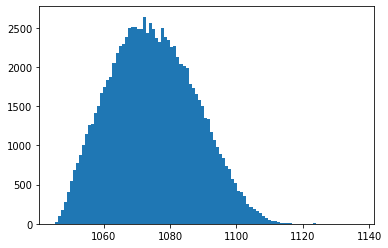

In [18]:
plt.hist(pd_SignalCuts['Lambda0_M'], bins=100)
plt.show()

# Lambda->ppi

In [12]:
pd_Backgroundindex=(abs(pd_Background['Lambda0_TRUEID'])==3122)&(abs(pd_Background['p_TRUEID'])==2212)&(abs(pd_Background['mu_TRUEID'])==211)

pd_BackgroundCuts = pd_Background[pd_Backgroundindex]


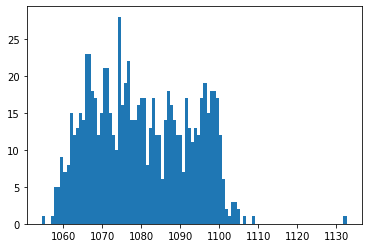

In [13]:
plt.hist(pd_BackgroundCuts['Lambda0_M'], bins=100)
plt.show()

In [30]:
cutsLppi=(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['pi_TRUEID'])==211) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122) & (pd_Signal['Lambda0_TRUEENDVERTEX_Z']!=pd_Signal['mu_TRUEORIGINVERTEX_Z'])
#pd_BackgroundCuts=pd_Background[(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['mu_TRUEID'])==211) & (abs(pd_Background['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122)]
pd_BackgroundCutsLppi=pd_Background[cutsLppi]



KeyError: 'pi_TRUEID'

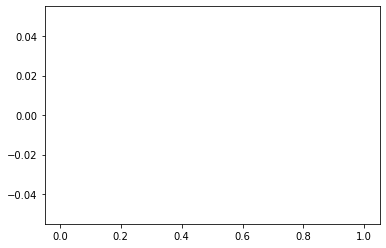

In [27]:
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'], bins=100)
plt.show()

# Problems, facing reality...

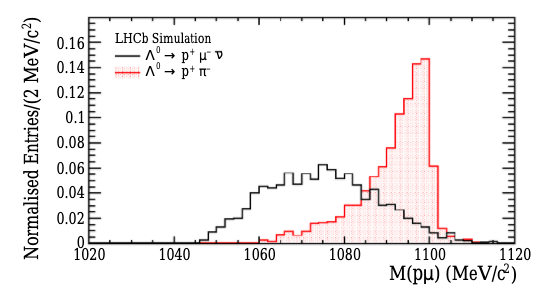

/Users/dan-ioanbultoc/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


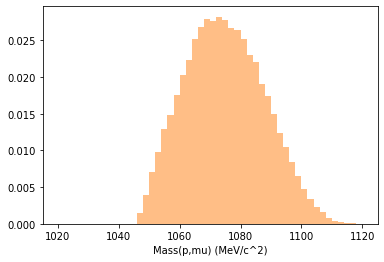

In [21]:
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'], range=[1020,1120],density=True,alpha=0.5, bins=50)
plt.hist(pd_SignalCuts['Lambda0_M'], density=True, range=[1020,1120],alpha=0.5, bins=50)
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.show()

As you can see, after previous selection cuts, some of the Lppi looks very similar to signal. We need to find ways to separate them

# TASKS

1. Apply the indicated cuts for decays in flight to pd_Background.
2. Create a new histogram showing the three Lambda0_M contributions (Signal, Lppi and Decays In flight)
3. Search how to create a legend in a histogram and add a legend with the info/ name of each contribution.

4. Write a description of your histogram and the behaviour of each channel. Take into consideration the image of the ideal case (behind the title of last section)

In [22]:
cutsEDIF=(abs(pd_Signal['Lambda0_TRUEID']==3122)) & (abs(pd_Signal['p_TRUEID']==2212)) & (abs(pd_Signal['mu_TRUEID'])==13) & (abs(pd_Signal['p_MC_MOTHER_ID'])==3122) & (abs(pd_Signal['mu_MC_MOTHER_ID'])==211) & (abs(pd_Signal['mu_MC_GD_MOTHER_ID'])==3122) & (pd_Signal['Lambda0_TRUEENDVERTEX_Z']!=pd_Signal["mu_TRUEORIGINVERTEX_Z"])

pd_Background=pd_Signal[cutsEDIF]



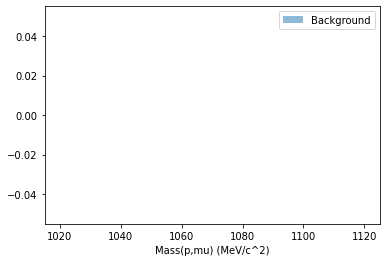

In [23]:
plt.clf()
plt.hist(pd_BackgroundCutsLppi['Lambda0_M'], range=[1020,1120],density=False,alpha=0.5, bins=50, label = 'Background')
#plt.hist(pd_Background['Lambda0_M'], density=False, range=[1020,1120],alpha=0.5, bins=50, label = 'Signal')
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.legend()
plt.show()